# Uber Service Optimization and Revenue Strategy Analysis

#### Data Extraction: From Database to Analysis
This project begins with SQL extraction of raw booking data directly from a MySQLvdatabase using the pymysql connector. We use Pandas to execute a technical data pipeline for cleaning, imputation, and feature engineering (e.g., creating time-based variables). This rigorous process establishes a robust dataset ready for statistical analysis of service efficiency and revenue drivers.

In [1]:
import sys
!{sys.executable} -m pip install pymysql --user

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import pymysql

In [3]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    database='uber_analysis',
    port=3309
)
cursor = connection.cursor()

In [4]:
cursor.execute("SELECT * FROM  ncr_ride_bookings_1 LIMIT 10")
results = cursor.fetchall()


In [5]:
query = "SELECT * FROM ncr_ride_bookings_1"
df = pd.read_sql(query, connection)
df


C:\Users\DELL\AppData\Local\Temp\ipykernel_62176\4091868914.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Reason_for_cancelling,Cancelled_Rides_by_Driver,Driver_Cancellation_Reason,Incomplete_Ride,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,null,null,...,null,null,null,null,null,null,null,null,null,null
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,null,null,null,1,Vehicle Breakdown,237,5.73,null,null,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,null,null,null,null,null,627,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,null,null,null,null,null,416,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,null,null,null,null,null,737,48.21,4.1,4.3,UPI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,...,null,null,null,null,null,475,40.08,3.7,4.1,Uber Wallet
149996,2024-11-24,15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,...,null,null,null,null,null,1093,21.31,4.8,5.0,UPI
149997,2024-09-18,10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,...,null,null,null,null,null,852,15.93,3.9,4.4,Cash
149998,2024-10-05,07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,...,null,null,null,null,null,333,45.54,4.1,3.7,UPI


# DATA CLEANING USING PANDAS 

In [6]:
print(len(df.columns))

21


In [7]:
df['Date'] = pd.to_datetime(df['Date'])    
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
# convert date and time to date-time object

In [8]:
df['Year']=df['Date'].dt.year
df['Day']=df['Date'].dt.day_name()

In [9]:
df.dtypes

Date                          datetime64[ns]
Time                          datetime64[ns]
Booking_ID                            object
Booking_Status                        object
Customer_ID                           object
Vehicle_Type                          object
Pickup_Location                       object
Drop_Location                         object
Avg_VTAT                              object
Avg_CTAT                              object
Cancelled                             object
Reason_for_cancelling                 object
Cancelled_Rides_by_Driver             object
Driver_Cancellation_Reason            object
Incomplete_Ride                       object
Incomplete_Rides_Reason               object
Booking_Value                         object
Ride_Distance                         object
Driver_Ratings                        object
Customer_Rating                       object
Payment_Method                        object
Year                                   int32
Day       

In [10]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Driver_Cancellation_Reason,Incomplete_Ride,Incomplete_Rides_Reason,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,Year,Day
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,null,null,...,null,null,null,null,null,null,null,null,2024,Saturday
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,null,1,Vehicle Breakdown,237,5.73,null,null,UPI,2024,Friday
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,null,null,null,627,13.58,4.9,4.9,Debit Card,2024,Friday
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,null,null,null,416,34.02,4.6,5.0,UPI,2024,Monday
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,null,null,null,737,48.21,4.1,4.3,UPI,2024,Monday


In [11]:
df.drop([
    'Reason_for_cancelling',
    'Driver_Cancellation_Reason',
    'Incomplete_Ride',
    'Incomplete_Rides_Reason'
], axis=1, inplace=True)

# dropping the useless columns

In [12]:
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Cancelled,Cancelled_Rides_by_Driver,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,Year,Day
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,null,null,null,null,null,null,null,null,null,2024,Saturday
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,null,null,237,5.73,null,null,UPI,2024,Friday
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,null,null,627,13.58,4.9,4.9,Debit Card,2024,Friday
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,null,null,416,34.02,4.6,5.0,UPI,2024,Monday
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,null,null,737,48.21,4.1,4.3,UPI,2024,Monday


In [13]:
df.duplicated().sum() # no duplicates

np.int64(0)

In [14]:
df.isnull().sum() #no null values as the values are null values are writen as null instead of np.nan

Date                         0
Time                         0
Booking_ID                   0
Booking_Status               0
Customer_ID                  0
Vehicle_Type                 0
Pickup_Location              0
Drop_Location                0
Avg_VTAT                     0
Avg_CTAT                     0
Cancelled                    0
Cancelled_Rides_by_Driver    0
Booking_Value                0
Ride_Distance                0
Driver_Ratings               0
Customer_Rating              0
Payment_Method               0
Year                         0
Day                          0
dtype: int64

In [15]:
num_cols = ['Avg_VTAT', 'Avg_CTAT', 'Booking_Value', 'Ride_Distance', 
            'Driver_Ratings', 'Customer_Rating']
cat_cols = ['Payment_Method']

In [16]:
df = df.replace("null", np.nan)

In [17]:
df.isnull().sum()

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
Avg_VTAT                      10500
Avg_CTAT                      48000
Cancelled                    139500
Cancelled_Rides_by_Driver    123000
Booking_Value                 48000
Ride_Distance                 48000
Driver_Ratings                57000
Customer_Rating               57000
Payment_Method                48000
Year                              0
Day                               0
dtype: int64

In [18]:
df.columns = df.columns.str.strip() 

In [19]:
df[num_cols] = df[num_cols].astype('float64')


In [20]:
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

In [21]:
for col in cat_cols:
    mode_val = df[col].mode()
    if len(mode_val) > 0:
        df[col] = df[col].fillna(mode_val[0])

In [22]:
df.isnull().sum()

    

Date                              0
Time                              0
Booking_ID                        0
Booking_Status                    0
Customer_ID                       0
Vehicle_Type                      0
Pickup_Location                   0
Drop_Location                     0
Avg_VTAT                          0
Avg_CTAT                          0
Cancelled                    139500
Cancelled_Rides_by_Driver    123000
Booking_Value                     0
Ride_Distance                     0
Driver_Ratings                    0
Customer_Rating                   0
Payment_Method                    0
Year                              0
Day                               0
dtype: int64

In [23]:
df["Cancelled"]=df['Cancelled'].replace(np.nan,0)

In [24]:
df["Cancelled_Rides_by_Driver"]=df["Cancelled_Rides_by_Driver"].replace(np.nan,0)

In [25]:
df.isnull().sum()

Date                         0
Time                         0
Booking_ID                   0
Booking_Status               0
Customer_ID                  0
Vehicle_Type                 0
Pickup_Location              0
Drop_Location                0
Avg_VTAT                     0
Avg_CTAT                     0
Cancelled                    0
Cancelled_Rides_by_Driver    0
Booking_Value                0
Ride_Distance                0
Driver_Ratings               0
Customer_Rating              0
Payment_Method               0
Year                         0
Day                          0
dtype: int64

In [26]:
df

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Cancelled,Cancelled_Rides_by_Driver,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,Year,Day
0,2024-03-23,1900-01-01 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,0,0,414.0,23.72,4.3,4.5,UPI,2024,Saturday
1,2024-11-29,1900-01-01 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,0,237.0,5.73,4.3,4.5,UPI,2024,Friday
2,2024-08-23,1900-01-01 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,0,627.0,13.58,4.9,4.9,Debit Card,2024,Friday
3,2024-10-21,1900-01-01 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,0,416.0,34.02,4.6,5.0,UPI,2024,Monday
4,2024-09-16,1900-01-01 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,0,737.0,48.21,4.1,4.3,UPI,2024,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,1900-01-01 19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,0,0,475.0,40.08,3.7,4.1,Uber Wallet,2024,Monday
149996,2024-11-24,1900-01-01 15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,0,0,1093.0,21.31,4.8,5.0,UPI,2024,Sunday
149997,2024-09-18,1900-01-01 10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,0,0,852.0,15.93,3.9,4.4,Cash,2024,Wednesday
149998,2024-10-05,1900-01-01 07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,0,0,333.0,45.54,4.1,3.7,UPI,2024,Saturday


In [27]:
df.to_csv("C:\\Users\\DELL\\OneDrive\\Documents\\ncr_ride_bookings_cleaned.csv", index=False)


In [28]:
query = "SELECT * FROM ncr_ride_bookings_cleaned"
df = pd.read_sql(query, connection)
df


C:\Users\DELL\AppData\Local\Temp\ipykernel_62176\1968333005.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Cancelled,Cancelled_Rides_by_Driver,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,Year,Day
0,2024-03-23,0 days 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,0,0,414.0,23.72,4.3,4.5,UPI,2024,Saturday
1,2024-11-29,0 days 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,0,0,237.0,5.73,4.3,4.5,UPI,2024,Friday
2,2024-08-23,0 days 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,0,0,627.0,13.58,4.9,4.9,Debit Card,2024,Friday
3,2024-10-21,0 days 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,0,0,416.0,34.02,4.6,5.0,UPI,2024,Monday
4,2024-09-16,0 days 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,0,0,737.0,48.21,4.1,4.3,UPI,2024,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2024-11-11,0 days 19:34:01,"""CNR6500631""",Completed,"""CID4337371""",Go Mini,MG Road,Ghitorni,10.2,44.4,0,0,475.0,40.08,3.7,4.1,Uber Wallet,2024,Monday
149996,2024-11-24,0 days 15:55:09,"""CNR2468611""",Completed,"""CID2325623""",Go Mini,Golf Course Road,Akshardham,5.1,30.8,0,0,1093.0,21.31,4.8,5.0,UPI,2024,Sunday
149997,2024-09-18,0 days 10:55:15,"""CNR6358306""",Completed,"""CID9925486""",Go Sedan,Satguru Ram Singh Marg,Jor Bagh,2.7,23.4,0,0,852.0,15.93,3.9,4.4,Cash,2024,Wednesday
149998,2024-10-05,0 days 07:53:34,"""CNR3030099""",Completed,"""CID9415487""",Auto,Ghaziabad,Saidulajab,6.9,39.6,0,0,333.0,45.54,4.1,3.7,UPI,2024,Saturday


# EXPLORATORY DATA ANALYSIS

## 1. Buisness Metrics 

### a. Completion Rate 

In [29]:
query = """
SELECT ROUND((SUM(CASE WHEN Cancelled = 0 THEN 1 ELSE 0 END) * 100.0) / COUNT(*), 2) AS Completion_Rate
FROM ncr_ride_bookings_cleaned
"""
cursor.execute(query)
result = cursor.fetchone()[0]
print(f"Completion Rate: {result}%")



Completion Rate: 93.00%


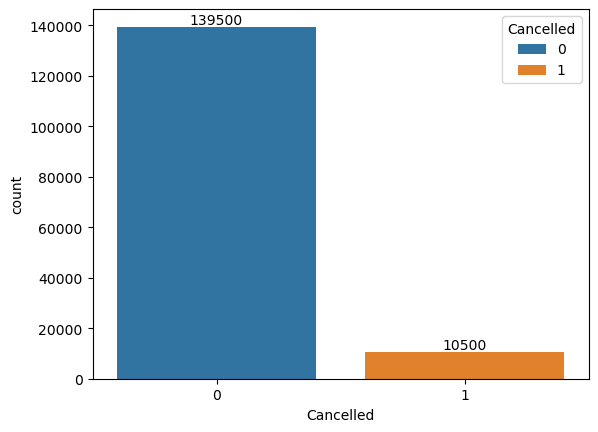

In [30]:
ax=sns.countplot(data=df,x='Cancelled',hue='Cancelled')
for bars in ax.containers:
    ax.bar_label(bars)
#0-> ride is completed
#1-> ride is cancelled

#### The overall service reliability is strong. Only 7% of all booking requests are cancelled by the customer or driver, Which surpasses the capabilites of other  top companies spaning on an avg from 85% to 90% overall completion rate.

### b. Total Revenure generated from bookings

In [31]:
query="""
SELECT SUM(Booking_Value) as  total_amount from ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
result=int(cursor.fetchone()[0])
print(f"Total Revenue from Bookings:₹{result}")

Total Revenue from Bookings:₹71718183


#### This is the gross transactional value of all rides in the dataset (after imputation), establishing the scale of the business being analyzed.

### c. Average Order Value (AOV)

In [32]:
query="""
SELECT ROUND(SUM(Booking_Value) / SUM(CASE WHEN Cancelled=0 THEN 1 ELSE 0 END ),2) as Avg_Order_Value 
from ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
result=cursor.fetchone()[0]
print(f"Average Order Value:₹{result}")

Average Order Value:₹514.11


#### This is the typical revenue generated per completed ride. This benchmark is useful for setting revenue targets and evaluating the impact of pricing changes.

### d. Overall Average Ratings

#### Average Driver Ratings

In [33]:
query="""
SELECT ROUND(AVG(Driver_Ratings),2)as Avg_Driver_Ratings
FROM ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
result=cursor.fetchone()[0]
print(f"Average Driver Ratings:{result}")

Average Driver Ratings:4.26


#### Customer satisfaction is high, but shows room for improvement to reach the next tier (e.g., aiming for 4.6+ to achieve a premium rating).

#### Average Customer Ratings

In [34]:
query="""
SELECT ROUND(AVG(Customer_Rating),2)as Avg_Customer_Ratings
FROM ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
result=cursor.fetchone()[0]
print(f"Average Customer Ratings:{result}")

Average Customer Ratings:4.44


#### Driver ratings are slightly lower than customer ratings, suggesting potential friction points in the driver experience or vehicle quality that could be investigated.

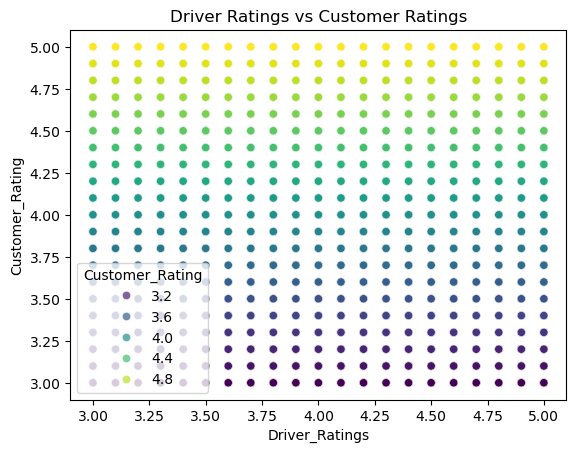

In [35]:
sns.scatterplot(
    data=df,
    x='Driver_Ratings',
    y='Customer_Rating',
    hue='Customer_Rating',
    palette='viridis',
    alpha=0.7
)
plt.title("Driver Ratings vs Customer Ratings")
plt.show()



## 2.Revenue Analysis

### a.Total Revenue per Vehicle Type

In [36]:
query="""
SELECT SUM(Booking_Value)as Revenue,Vehicle_Type FROM `ncr_ride_bookings_cleaned` GROUP BY Vehicle_Type
"""
cursor.execute(query)
result=cursor.fetchall()
result

((17848078.0, 'Auto'),
 (10799867.0, 'Bike'),
 (5016149.0, 'eBike'),
 (14247484.0, 'Go Mini'),
 (13022441.0, 'Go Sedan'),
 (8674876.0, 'Premier Sedan'),
 (2109288.0, 'Uber XL'))

In [37]:
res=pd.DataFrame(result,columns=["Revenue","Vehicle_Type"])

In [38]:
res['Revenue'] = res['Revenue'].astype(float)/1e7
res['Revenue']

0    1.784808
1    1.079987
2    0.501615
3    1.424748
4    1.302244
5    0.867488
6    0.210929
Name: Revenue, dtype: float64

Text(0.5, 1.0, "Total Revenue per Vehicle Type in cr's")

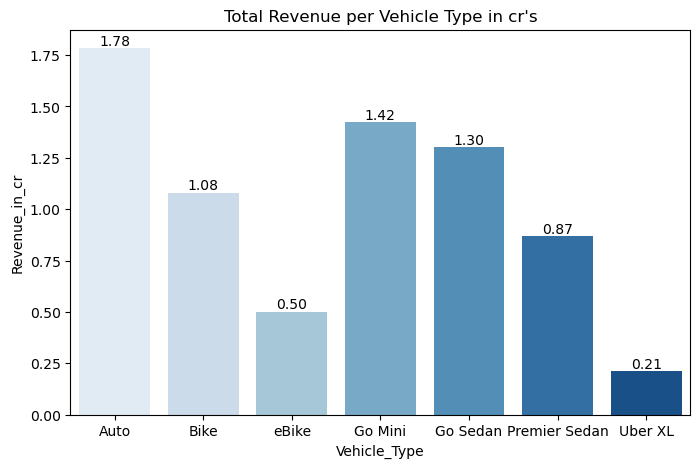

In [39]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=res,x='Vehicle_Type',y='Revenue',hue='Vehicle_Type',palette="Blues")
for bar in ax.containers:
     ax.bar_label(bar, fmt='%.2f')
plt.ylabel("Revenue_in_cr")
plt.title("Total Revenue per Vehicle Type in cr's")


#### Top Revenue Driver: Auto (₹1.78 Cr) is the primary source of revenue, likely due to a high volume of short-to-medium distance trips. 

#### Segment Concentration: Go Mini (₹1.42 Cr) and Go Sedan (₹1.30 Cr) are the next largest contributors, indicating a significant market for economy 4-wheelers.

#### Uber XL (₹0.21 Cr) generates the least revenue, suggesting either limited supply/demand or a need for targeted promotion for this high-capacity segment.

### b. Revenue by Day of Week

In [40]:
query="""
SELECT SUM(Booking_Value)as Revenue,Day
FROM `ncr_ride_bookings_cleaned` 
GROUP BY Day
ORDER BY Revenue DESC;
"""
cursor.execute(query)
response=cursor.fetchall()
response

((12459893.0, 'Sunday'),
 (12391737.0, 'Saturday'),
 (9524987.0, 'Friday'),
 (9414687.0, 'Wednesday'),
 (9337276.0, 'Thursday'),
 (9321081.0, 'Monday'),
 (9268522.0, 'Tuesday'))

In [41]:
rev=pd.DataFrame(response,columns=['Revenue','Day'])

In [42]:
rev['Revenue']=rev['Revenue'].astype(float) / 1e7

Text(0.5, 1.0, "Revenue by Day of Week in cr's")

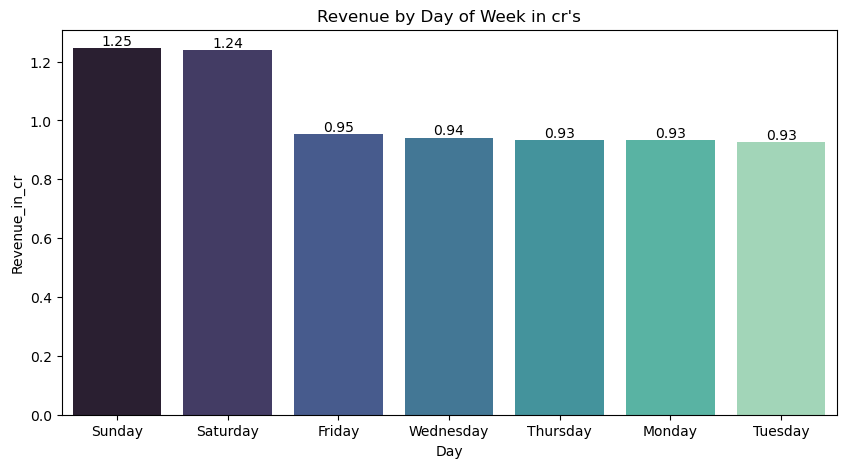

In [43]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=rev,x='Day',y='Revenue',hue='Day', palette='mako')
for bar in ax.containers:
     ax.bar_label(bar, fmt='%.2f')
plt.ylabel("Revenue_in_cr")
plt.title("Revenue by Day of Week in cr's")


#### Weekend Peak: Sunday (₹1.25 Cr) and Saturday (₹1.24 Cr) generate significantly higher revenue than weekdays, indicating peak demand and a high spending tendency on weekends.

#### Weekday Consistency: Weekday revenue is relatively flat (₹90 Lakhs - ₹95 lakhs), with Friday being only slightly higher than other weekdays, suggesting consistent commuting/daily activity.

### c. Revenue on the basis of concentration

In [44]:
query="""
SELECT SUM(Booking_Value)as Revenue,Pickup_Location FROM `ncr_ride_bookings_cleaned` 
GROUP BY Pickup_Location 
ORDER BY Revenue DESC LIMIT 5;
"""
cursor.execute(query)
response =cursor.fetchall()
response

((460386.0, 'Barakhamba Road'),
 (457320.0, 'Khandsa'),
 (450702.0, 'Pataudi Chowk'),
 (449519.0, 'AIIMS'),
 (448495.0, 'Badarpur'))

In [45]:
loc=pd.DataFrame(response,columns=['Revenue','Location'])

Text(0.5, 1.0, 'Locations producing the highest revenue')

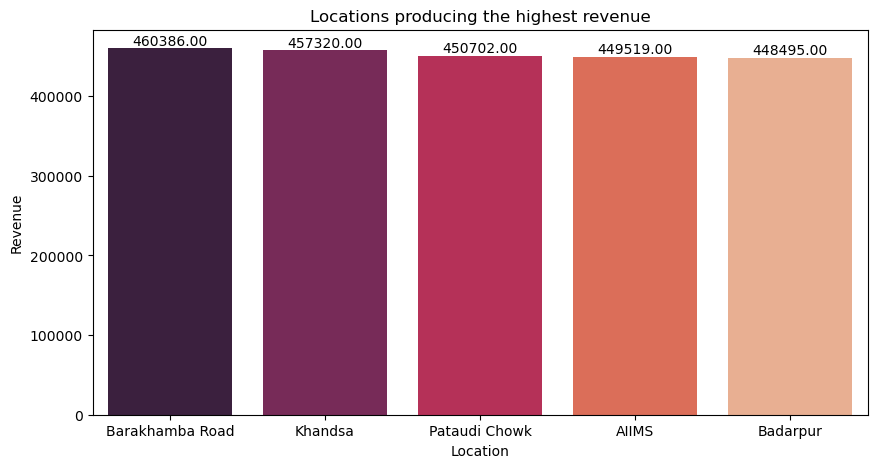

In [46]:
plt.figure(figsize=(10,5))
ax=sns.barplot(data=loc,x='Location',y='Revenue', palette='rocket',hue="Location")
for bar in ax.containers:
     ax.bar_label(bar, fmt='%.2f')

plt.title("Locations producing the highest revenue")

#### The top 5 locations (Barakhamba Road, Khandsa, Pataudi Chowk, AIIMS, Badarpur) show a high concentration of booking value, suggesting they are critical business hubs or high-traffic areas where pricing is effective.

### d.Payment Method Preferneces

In [47]:
query="""
SELECT SUM(Booking_Value)as Revenue,Payment_Method 
FROM `ncr_ride_bookings_cleaned` 
GROUP BY Payment_Method
ORDER BY Revenue DESC ;
"""
cursor.execute(query)
result=cursor.fetchall()
result

((43217101.0, 'UPI'),
 (12895649.0, 'Cash'),
 (6200898.0, 'Uber Wallet'),
 (5224025.0, 'Credit Card'),
 (4180510.0, 'Debit Card'))

In [48]:
pay=pd.DataFrame(result,columns=["Revenue","Payment_Method"])
pay

,Revenue,Payment_Method
0,43217101.0,UPI
1,12895649.0,Cash
2,6200898.0,Uber Wallet
3,5224025.0,Credit Card
4,4180510.0,Debit Card


Text(0.5, 1.0, 'Revenue from Different Payment Methods')

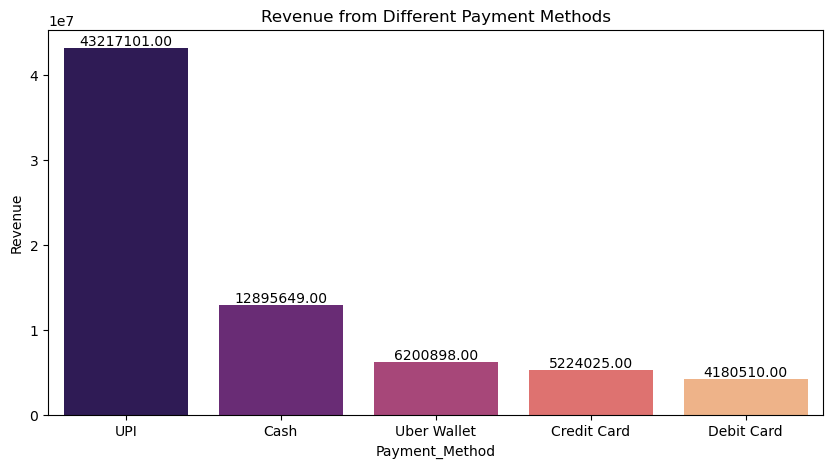

In [49]:
plt.figure(figsize=(10,5))

ax=sns.barplot(data=pay,x='Payment_Method',y='Revenue', palette='magma',hue="Payment_Method")
for bar in ax.containers:
     ax.bar_label(bar, fmt='%.2f')

plt.title("Revenue from Different Payment Methods")

#### Digital Dominance: UPI (₹4.32 Cr) is the overwhelming preferred payment method, generating the most revenue, followed by Cash (

#### Opportunity: The large gap between UPI and Credit/Debit Card payments suggests there might be room to encourage card usage through promotions or better user experience flows.

## 3.Cancellation Analysis

### a.Overall Cancellation Rate

In [50]:
query="""
SELECT COUNT(*) AS No_of_rides,Cancelled 
FROM ncr_ride_bookings_cleaned 
GROUP by Cancelled;
"""
cursor.execute(query)
re=cursor.fetchall()
re


((139500, 0), (10500, 1))

In [51]:
ca=pd.DataFrame(re,columns=["No_of_Rides","Cancelled"])
ca

,No_of_Rides,Cancelled
0,139500,0
1,10500,1


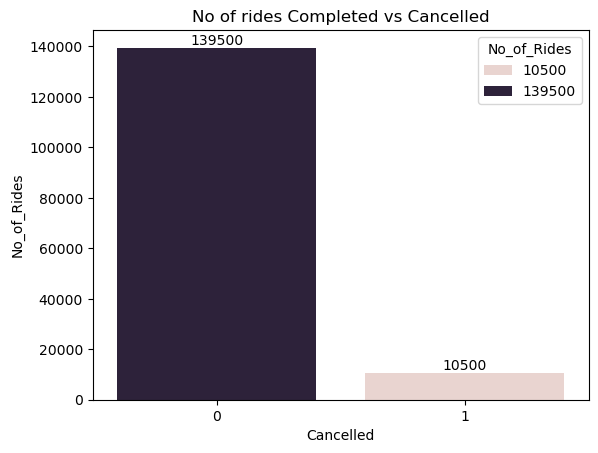

In [52]:
ax=sns.barplot(data = ca,x="Cancelled",y="No_of_Rides",hue="No_of_Rides")
plt.title("No of rides Completed vs Cancelled")
for bars in ax.containers:
    ax.bar_label(bars)


#### Overall Cancellation: The dataset shows 10,500 cancelled rides (7% of total), validating the completion rate insight.

### b.Cancellation Rate by Vehicle Type

In [53]:
query="""
SELECT Vehicle_Type,COUNT(Cancelled)as Cancelled FROM ncr_ride_bookings_cleaned
WHERE Cancelled=1 
GROUP BY Vehicle_Type;
"""
cursor.execute(query)
result= cursor.fetchall()
result

(('Auto', 2680),
 ('Bike', 1575),
 ('eBike', 723),
 ('Go Mini', 2097),
 ('Go Sedan', 1832),
 ('Premier Sedan', 1266),
 ('Uber XL', 327))

In [54]:
veh=pd.DataFrame(result,columns=['Vehicle_Type','Cancelled'])
veh


,Vehicle_Type,Cancelled
0,Auto,2680
1,Bike,1575
2,eBike,723
3,Go Mini,2097
4,Go Sedan,1832
5,Premier Sedan,1266
6,Uber XL,327


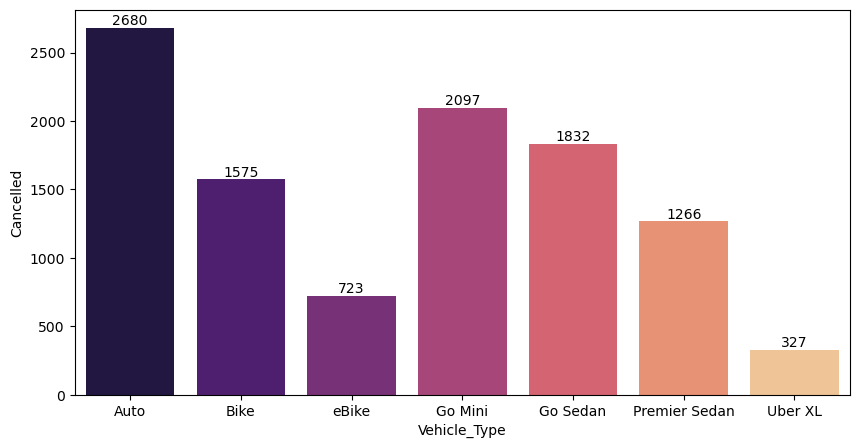

In [55]:
plt.figure(figsize=(10,5))
ax= sns.barplot(veh,x='Vehicle_Type',y='Cancelled',hue='Vehicle_Type',palette="magma")
for bars in ax.containers:
    ax.bar_label(bars)

#### Auto & Go Mini Concern: Auto (2,680) and Go Mini (2,097) have the highest count of cancellations. While this may correlate with their high volume, it signals where operational improvements are needed most.

#### Uber XL Success: Uber XL (327) has the lowest cancellation count, reinforcing its segment stability.

### C.Cancellation Rate per Month

In [56]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].dt.month_name()
df[['Month']]

,Month
0,March
1,November
2,August
3,October
4,September
...,...
149995,November
149996,November
149997,September
149998,October


In [57]:
ax = df[df["Cancelled"] == 1]["Month"].value_counts()


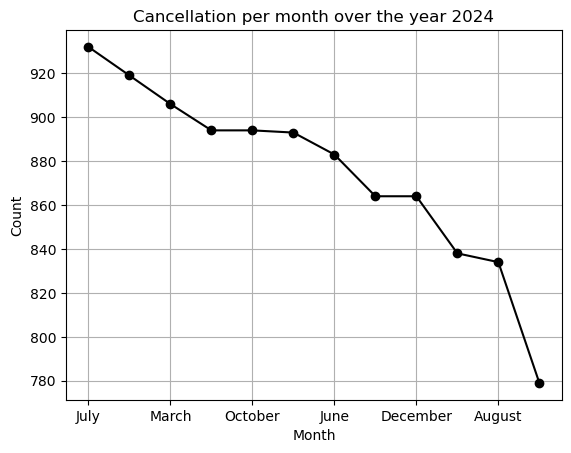

In [58]:
bx=ax.plot(kind="line",marker="o",color="black")
plt.ylabel("Count")
plt.title("Cancellation per month over the year 2024")
plt.grid()

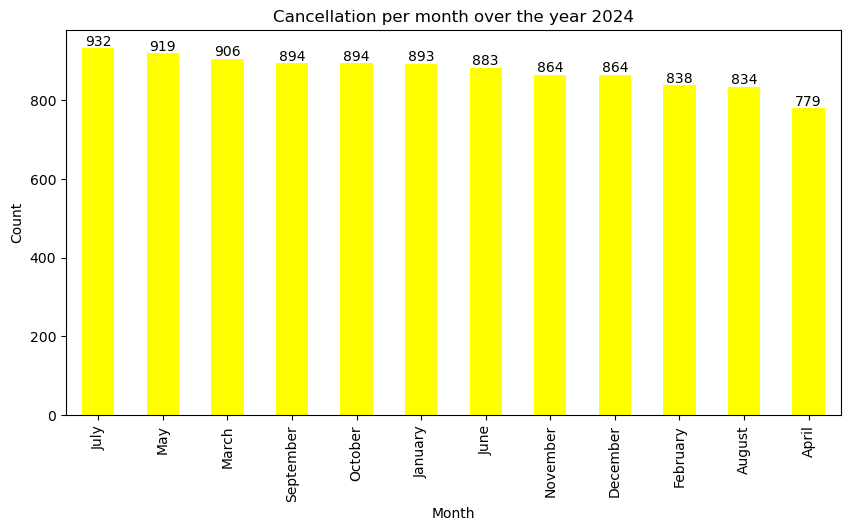

In [59]:
plt.figure(figsize=(10,5))
cx=ax.plot(kind="bar",color="Yellow")
plt.ylabel("Count")
plt.title("Cancellation per month over the year 2024")
for bars in cx.containers:
    cx.bar_label(bars)

### d.Cancelation Time Patterns

In [60]:
df['Hour'] = df['Time'].dt.components['hours']
df[['Hour']]

,Hour
0,12
1,18
2,8
3,17
4,22
...,...
149995,19
149996,15
149997,10
149998,7


In [61]:
ax=df[df['Cancelled']==1]['Hour'].value_counts()
df_new=pd.DataFrame(ax)
df_new

,count
Hour,
18,889
19,822
17,746
10,670
16,634
15,634
20,633
9,559
11,557


Text(0.5, 1.0, 'Cancellation Time Pattern')

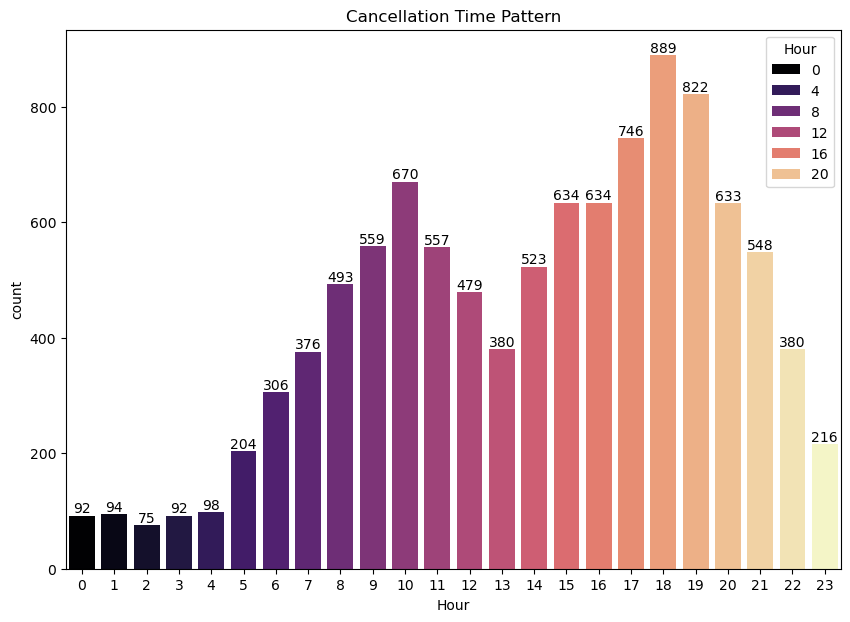

In [62]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=df_new,x="Hour",y="count",hue="Hour",palette="magma")
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Cancellation Time Pattern")


Text(0.5, 1.0, 'Cancellation Time Pattern')

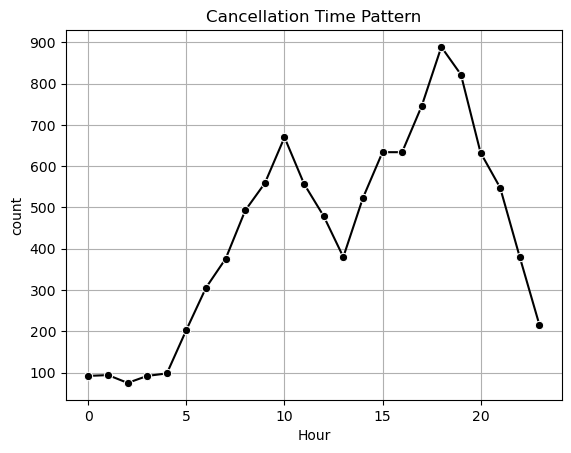

In [63]:
ax = sns.lineplot(data=df_new, x="Hour", y="count", marker="o", color="black")
plt.grid()
plt.title("Cancellation Time Pattern")

#### Peak Cancellation Hours: Cancellations spike significantly during the evening rush hour (17:00 to 20:00), with a peak at 18:00 (889 cancellations) and 19:00 (822 cancellations).

### e. Revenue Lost

In [64]:
query="""SELECT SUM(Booking_Value) AS Revenue_Lost 
FROM ncr_ride_bookings_cleaned 
WHERE Cancelled=1;
"""
cursor.execute(query)
result=cursor.fetchone()[0]
print(f"Overall Revenue that was lost Due to Cancellation is: {result}")


Overall Revenue that was lost Due to Cancellation is: 4347000.0


#### Total Lost Revenue: The overall revenue lost due to cancellations is ₹43.47 Lakhs.

#### e.1. Revenue Lost per Vehicle type

In [65]:
query="""
SELECT SUM(Booking_Value) AS Revenue_Lost,Vehicle_Type
FROM ncr_ride_bookings_cleaned 
WHERE Cancelled=1
GROUP BY Vehicle_Type
"""
cursor.execute(query)
result=cursor.fetchall()
result


((1109520.0, 'Auto'),
 (652050.0, 'Bike'),
 (299322.0, 'eBike'),
 (868158.0, 'Go Mini'),
 (758448.0, 'Go Sedan'),
 (524124.0, 'Premier Sedan'),
 (135378.0, 'Uber XL'))

In [66]:
vh=pd.DataFrame(result,columns=["Revenue_Lost","Vehicle_Type"])
vh
vh['Revenue_Lost']=vh['Revenue_Lost'] /1e6
vh

,Revenue_Lost,Vehicle_Type
0,1.109520,Auto
1,0.652050,Bike
2,0.299322,eBike
3,0.868158,Go Mini
4,0.758448,Go Sedan
5,0.524124,Premier Sedan
6,0.135378,Uber XL


Text(0.5, 1.0, 'Revenue Lost per Vehicle Type')

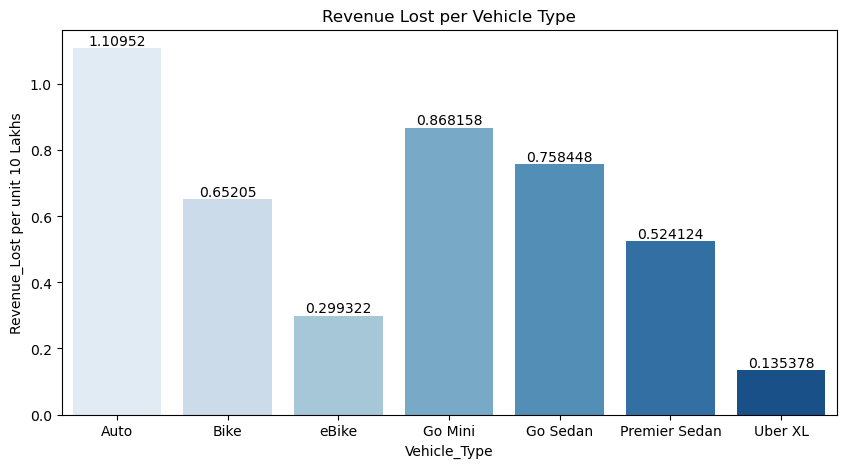

In [67]:
plt.figure(figsize=(10,5))
dx=sns.barplot(data=vh,x="Vehicle_Type",y="Revenue_Lost", hue="Vehicle_Type",palette="Blues")
for bars in dx.containers:
    dx.bar_label(bars)
plt.ylabel("Revenue_Lost per unit 10 Lakhs")
plt.title("Revenue Lost per Vehicle Type")

#### Auto & Go Mini Impact: These two categories contribute the most to lost revenue, mirroring the high cancellation counts, making them a primary focus for intervention.

## 4.Customer Satisfaction & Loyalty

### a.Average Customer Rating


In [68]:
query="""
SELECT ROUND(AVG(Customer_Rating),2) as Average_Customer_Rating
FROM ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
rating=cursor.fetchone()[0]
print(f"Average_Rating: {rating}")

Average_Rating: 4.44


### b.Average Driver Rating

In [69]:
query="""
SELECT ROUND(AVG(Driver_Ratings),2) as Average_Driver_Rating
FROM ncr_ride_bookings_cleaned;
"""
cursor.execute(query)
rating=cursor.fetchone()[0]
print(f"Average_Rating: {rating}")


Average_Rating: 4.26


### c. Average Rating by Vehicle Type

In [70]:
query="""
SELECT Customer_Rating,Driver_Ratings,Vehicle_Type FROM ncr_ride_bookings_cleaned GROUP BY Vehicle_Type;
"""
cursor.execute(query)
rat=cursor.fetchall()
rat


((4.9, 4.9, 'Auto'),
 (4.3, 4.1, 'Bike'),
 (4.5, 4.3, 'eBike'),
 (4.1, 4.0, 'Go Mini'),
 (4.5, 4.3, 'Go Sedan'),
 (5.0, 4.6, 'Premier Sedan'),
 (4.2, 3.8, 'Uber XL'))

In [71]:
rat=pd.DataFrame(rat,columns=['Customer_Rating','Driver_Rating','Vehicle_Type'])
rat

,Customer_Rating,Driver_Rating,Vehicle_Type
0,4.9,4.9,Auto
1,4.3,4.1,Bike
2,4.5,4.3,eBike
3,4.1,4.0,Go Mini
4,4.5,4.3,Go Sedan
5,5.0,4.6,Premier Sedan
6,4.2,3.8,Uber XL


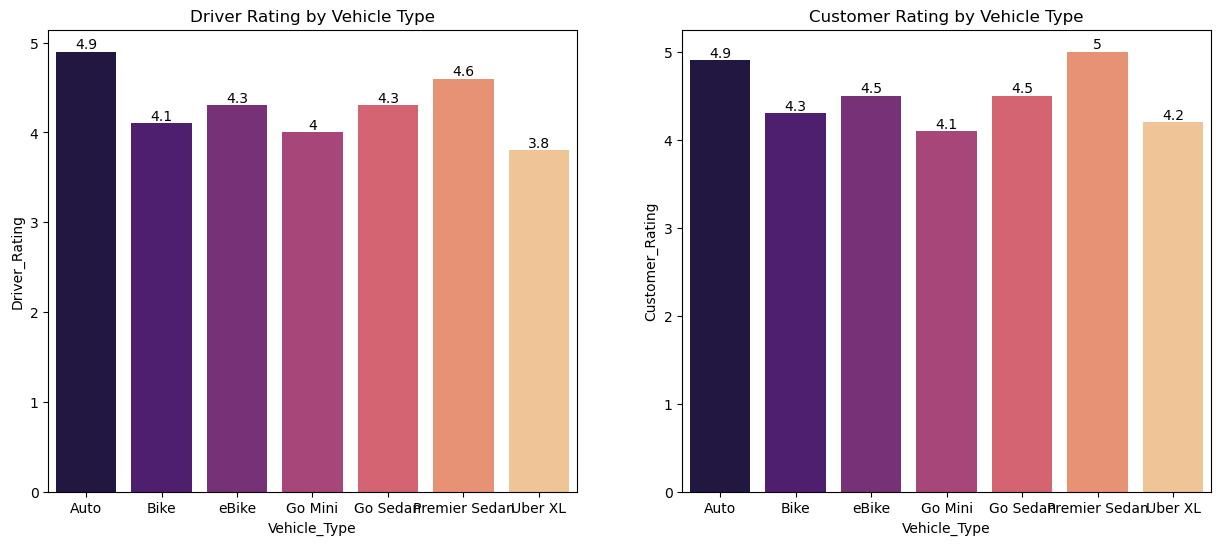

In [72]:
fig,ax=plt.subplots(1,2,figsize=(15, 6))
sns.barplot(data=rat, x="Vehicle_Type", y="Driver_Rating", hue="Vehicle_Type", palette="magma", ax=ax[0])
ax[0].set_title("Driver Rating by Vehicle Type")
sns.barplot(data=rat, x="Vehicle_Type", y="Customer_Rating", hue="Vehicle_Type", palette="magma", ax=ax[1])
ax[1].set_title("Customer Rating by Vehicle Type")
for bars in ax[0].containers:
    ax[0].bar_label(bars)
for bars in ax[1].containers:
    ax[1].bar_label(bars)

In [73]:
df.columns

Index(['Date', 'Time', 'Booking_ID', 'Booking_Status', 'Customer_ID',
       'Vehicle_Type', 'Pickup_Location', 'Drop_Location', 'Avg_VTAT',
       'Avg_CTAT', 'Cancelled', 'Cancelled_Rides_by_Driver', 'Booking_Value',
       'Ride_Distance', 'Driver_Ratings', 'Customer_Rating', 'Payment_Method',
       'Year', 'Day', 'Month', 'Hour'],
      dtype='object')

#### Both the Average  ratings drivers and customers are above 4 which is quite an impressive feat, while the average customer rating is 4.44 and the average driver rating is 4.26 we should not ignore the ratings on the basis of vehicle types.Auto has the highest driver rating and the second highest customer rating of 4.9 and Premier has the highest avg  customer rating  of 5 .

#### The lowest overall ratings are given to uber xl , while the lowest avg customer ratings are given to go Mini and  the lowest driver ratings are given to uber xl

#### d.How Many Customers Are Repeating

In [74]:
df['Repeat_Customer'] = df['Customer_ID'].duplicated(keep=False).astype(int)


In [75]:
corr_cust = df['Customer_Rating'].astype(float).corr(df['Repeat_Customer'])
corr_driver = df['Driver_Ratings'].astype(float).corr(df['Repeat_Customer'])

print("Customer Rating vs Repeat Customers:", corr_cust)
print("Driver Rating vs Repeat Customers:", corr_driver)


Customer Rating vs Repeat Customers: -0.0013934351160364968
Driver Rating vs Repeat Customers: -0.0004206939139437609


Text(0.5, 1.0, 'Correlation between Ratings and Repeat Customers')

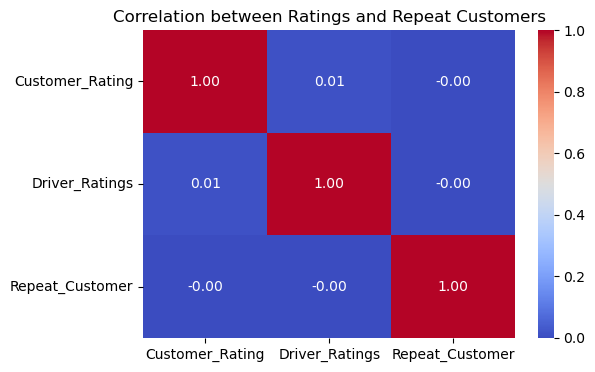

In [76]:
df['Customer_Rating'] = pd.to_numeric(df['Customer_Rating'], errors='coerce')
df['Driver_Ratings'] = pd.to_numeric(df['Driver_Ratings'], errors='coerce')
df['Repeat_Customer'] = pd.to_numeric(df['Repeat_Customer'], errors='coerce')


corr = df[['Customer_Rating', 'Driver_Ratings', 'Repeat_Customer']].corr()


plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Ratings and Repeat Customers")

#### Extremely Weak Positive Correlation: This indicates that there is virtually no linear relationship between the ratings customers give and the ratings drivers receive. A slightly higher customer rating does not reliably mean the driver received a slightly higher rating, and vice-versa.

# ACTIONABLE INSIGHTS ON THE BASIS OF DATA

## 1. Driver Efficiency & Bottleneck Analysis 


#### Problem: Long wait times cause cancellations and customer dissatisfaction

In [77]:
query="""
SELECT 
    CASE 
        WHEN Avg_VTAT < 10 THEN 'Fast (<10 min)'
        WHEN Avg_VTAT < 20 THEN 'Medium (10-20 min)'
        ELSE 'Slow (>20 min)'
    END AS TAT_Category,
    COUNT(*) AS Total_Rides,
    SUM(CASE WHEN Cancelled = 1 THEN 1 ELSE 0 END) AS Cancelled_Rides,
    ROUND(AVG(CASE WHEN Cancelled = 1 THEN 1.0 ELSE 0.0 END) * 100, 2) AS Cancellation_Rate
   FROM ncr_ride_bookings_1
GROUP BY TAT_Category
ORDER BY Cancellation_Rate DESC;
"""
cursor.execute(query)
result=cursor.fetchall()
result

(('Slow (>20 min)', 38, Decimal('38'), Decimal('100.00')),
 ('Medium (10-20 min)', 49400, Decimal('6989'), Decimal('14.15')),
 ('Fast (<10 min)', 100562, Decimal('3473'), Decimal('3.45')))

In [78]:
cat=pd.DataFrame(result,columns=["Tat_Category","Total_Rides","Cancelled_Rides","Cancellation_Rate"])
cat

,Tat_Category,Total_Rides,Cancelled_Rides,Cancellation_Rate
0,Slow (>20 min),38,38,100.00
1,Medium (10-20 min),49400,6989,14.15
2,Fast (<10 min),100562,3473,3.45


Text(0.5, 1.0, 'Cancellation_Rate With Respect to Tat_Category')

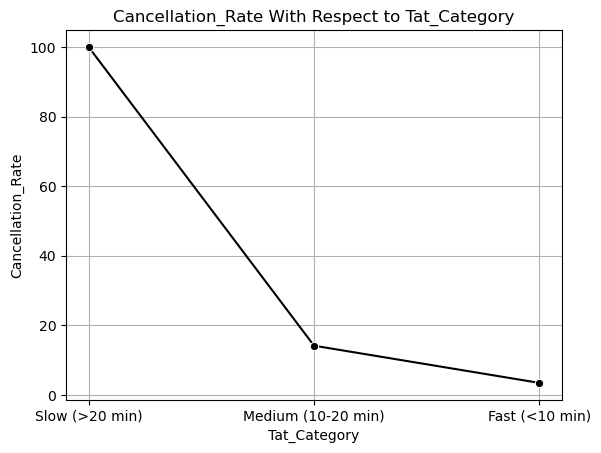

In [79]:
sns.lineplot(data=cat,x="Tat_Category",y="Cancellation_Rate",marker="o",color="black")
plt.grid()
plt.title("Cancellation_Rate With Respect to Tat_Category")

In [80]:
mapping={"Slow (>20 min)":3,"Medium (10-20 min)":2,"Fast (<10 min)":1}
cat['Tat_Category_Num'] = cat['Tat_Category'].map(mapping)

cat

,Tat_Category,Total_Rides,Cancelled_Rides,Cancellation_Rate,Tat_Category_Num
0,Slow (>20 min),38,38,100.00,3
1,Medium (10-20 min),49400,6989,14.15,2
2,Fast (<10 min),100562,3473,3.45,1


#### when VTAT IS more than 20 minutes cancellation is 100% so it might show a strong  positive co-orelation with  cacellation rate

In [81]:
corr_matrix=cat[['Tat_Category_Num', 'Cancellation_Rate']].corr()
corr_matrix

,Tat_Category_Num,Cancellation_Rate
Tat_Category_Num,1.000000,0.912132
Cancellation_Rate,0.912132,1.000000


Text(0.5, 1.0, 'Cancellation Rate and Vtat_Relation')

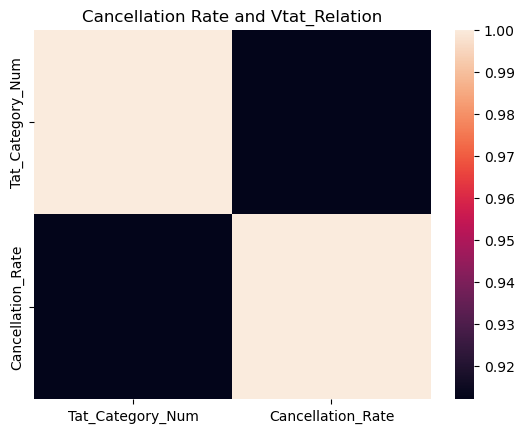

In [82]:
sns.heatmap(corr_matrix,fmt=".2f")
plt.title("Cancellation Rate and Vtat_Relation")

#### This heatmap confirms the core operational insight: There is a very strong positive correlation between a higher (slower) VTAT category and a higher Cancellation Rate.In practical terms: The longer the estimated wait time (as represented by a higher Tat_Category_Num), the more likely the ride is to be cancelled. This strongly suggests that long wait times are the primary driver of ride cancellations.

## 2. Dynamic Pricing Opportunities 

### Problem: Not maximizing revenue during high-demand periods(High Demand-low supply)

In [83]:
completed = df[df['Cancelled'] == 0]
completed.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,...,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating,Payment_Method,Year,Day,Month,Hour,Repeat_Customer
0,2024-03-23,0 days 12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.3,28.8,...,414.0,23.72,4.3,4.5,UPI,2024,Saturday,March,12,0
1,2024-11-29,0 days 18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,237.0,5.73,4.3,4.5,UPI,2024,Friday,November,18,0
2,2024-08-23,0 days 08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,627.0,13.58,4.9,4.9,Debit Card,2024,Friday,August,8,0
3,2024-10-21,0 days 17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,416.0,34.02,4.6,5.0,UPI,2024,Monday,October,17,0
4,2024-09-16,0 days 22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,737.0,48.21,4.1,4.3,UPI,2024,Monday,September,22,0


In [84]:
demand=df.groupby(["Day","Hour"]).size().reset_index(name="Total_requests")
demand.head()

,Day,Hour,Total_requests
0,Friday,0,180
1,Friday,1,187
2,Friday,2,190
3,Friday,3,203
4,Friday,4,204


In [85]:
supply=completed.groupby(["Day","Hour"]).size().reset_index(name="Completed_requests")
supply.head()

,Day,Hour,Completed_requests
0,Friday,0,165
1,Friday,1,172
2,Friday,2,181
3,Friday,3,195
4,Friday,4,185


In [86]:
merged=pd.merge(demand,supply,on=["Day","Hour"],how="left").fillna(0)
merged

,Day,Hour,Total_requests,Completed_requests
0,Friday,0,180,165
1,Friday,1,187,172
2,Friday,2,190,181
3,Friday,3,203,195
4,Friday,4,204,185
...,...,...,...,...
163,Wednesday,19,1565,1454
164,Wednesday,20,1412,1322
165,Wednesday,21,1109,1034
166,Wednesday,22,791,727


In [87]:
merged['Demand_Supply_Gap'] = merged['Total_requests'] - merged['Completed_requests']

In [88]:
merged

,Day,Hour,Total_requests,Completed_requests,Demand_Supply_Gap
0,Friday,0,180,165,15
1,Friday,1,187,172,15
2,Friday,2,190,181,9
3,Friday,3,203,195,8
4,Friday,4,204,185,19
...,...,...,...,...,...
163,Wednesday,19,1565,1454,111
164,Wednesday,20,1412,1322,90
165,Wednesday,21,1109,1034,75
166,Wednesday,22,791,727,64


In [89]:
pivot = merged.pivot_table(values='Demand_Supply_Gap', index='Day', columns='Hour')
pivot

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,15.0,15.0,9.0,8.0,19.0,25.0,39.0,54.0,91.0,65.0,...,91.0,103.0,99.0,102.0,135.0,128.0,101.0,60.0,47.0,37.0
Monday,12.0,15.0,10.0,13.0,13.0,30.0,46.0,60.0,65.0,81.0,...,69.0,95.0,90.0,107.0,156.0,92.0,102.0,99.0,57.0,27.0
Saturday,10.0,16.0,11.0,11.0,17.0,32.0,47.0,59.0,62.0,82.0,...,69.0,81.0,72.0,113.0,112.0,113.0,91.0,80.0,52.0,32.0
Sunday,15.0,17.0,12.0,14.0,17.0,23.0,48.0,52.0,73.0,84.0,...,82.0,74.0,99.0,109.0,128.0,131.0,87.0,76.0,55.0,29.0
Thursday,16.0,9.0,9.0,12.0,8.0,37.0,42.0,52.0,66.0,75.0,...,84.0,89.0,87.0,99.0,123.0,124.0,81.0,70.0,58.0,29.0
Tuesday,11.0,11.0,11.0,18.0,14.0,28.0,46.0,39.0,69.0,83.0,...,83.0,99.0,81.0,110.0,107.0,123.0,81.0,88.0,47.0,24.0
Wednesday,13.0,11.0,13.0,16.0,10.0,29.0,38.0,60.0,67.0,89.0,...,45.0,93.0,106.0,106.0,128.0,111.0,90.0,75.0,64.0,38.0


Text(0.5, 1.0, 'High-Demand, Low-Supply Periods (Demand-Supply Gap)')

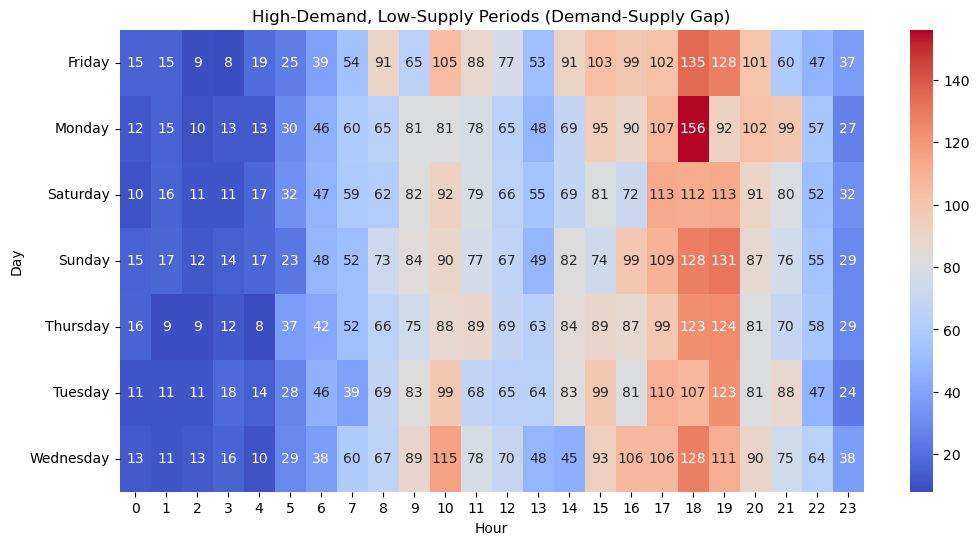

In [90]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".0f")
plt.title("High-Demand, Low-Supply Periods (Demand-Supply Gap)")

#### 1. Critical Bottleneck Period (Evening Rush)
The most severe imbalances are consistently concentrated in the late afternoon and evening (Hours 16 to 20, or 4 PM to 8 PM).

Peak Gaps: The highest gap figures are found here, with Monday at 18:00 (6 PM) showing the absolute maximum value of 156.

Weekend vs. Weekday Peaks: High gaps persist throughout the week, but Monday, Friday, and Sunday evenings show especially pronounced red areas. This suggests both commuting and leisure demand are straining the system at their respective peaks.

#### 2. Low-Demand/High-Supply Periods
Early Morning (Hours 0 to 5): The deepest blue colors appear during the very late night and early morning. The gap is small (often single digits), meaning supply easily accommodates the minimal demand.

#### 3.Actionable Focus
Uber must focus operational resources (e.g., driver incentives, dynamic pricing, or targeted supply campaigns) heavily on Monday and Friday evenings to bring supply in line with demand and prevent the long wait times that directly cause cancellations (as established in the VTAT correlation analysis).

## 3.Customer Churn Based on Location

In [92]:
location_churn = df[df['Customer_ID'].isin(churned_customers['Customer_ID'])].groupby('Pickup_Location').agg(
        Churned_Customers=('Customer_ID', 'nunique'),
        Avg_Wait=('Avg_VTAT', 'mean'),
        Avg_Rating=('Customer_Rating', 'mean'),
        Lost_Revenue=('Booking_Value', 'sum')
    ).sort_values('Lost_Revenue', ascending=False).reset_index()

location_churn=location_churn.head(10)
location_churn


NameError: name 'churned_customers' is not defined

In [93]:
plt.figure(figsize=(13,5))
ax=sns.barplot(location_churn,x="Pickup_Location",y="Churned_Customers",hue="Pickup_Location",palette="magma")
for bars in ax.containers:
    ax.bar_label(bars)


NameError: name 'location_churn' is not defined

<Figure size 1300x500 with 0 Axes>

## Core Insights

#### 1.Top Churn Locations and Financial Impact:

Barakhamba Road and Khandsa are the top two locations, leading to the highest financial loss (₹460,386 and ₹457,320, respectively) and the highest number of unique churned customers (946 and 949).

The top 10 locations show a tight cluster of lost revenue, all ranging from ₹435,444 to ₹460,386. This suggests that these are major areas where customer retention efforts could yield the highest return.

#### 2.Wait Time is Not the Sole Predictor:
While we previously established that long wait times correlate with cancellation, within these top-churn locations, the average wait times (Avg_Wait) are relatively consistent, ranging from $8.28$ to $8.71$ minutes.The highest average wait time among the top 10 is at Badarpur ($8.71$ min). This suggests that while $8$ minutes is relatively "Fast" overall (based on your previous analysis), it's the limit customers tolerate before deciding to churn at these high-demand locations.

#### 3.Rating is Not a Factor
:The average customer rating (Avg_Rating) is also high and consistent across these top locations, hovering around $4.43$ to $4.47$. This reinforces the previous insight that ratings do not linearly predict a customer's likelihood to become a repeat customer or, in this case, churn.

## Actionable Insights

### Targeted Supply Boost:
Operations should use the specific Demand-Supply Gap data for the identified peak hours (17:00–20:00) and geographically target these 10 areas for supply incentives or geo-fenced surge pricing to reduce wait times to the absolute minimum.

In [94]:
df["Ride_Distance"].mean()

np.float64(24.34356793333333)